## TENTANG DATA

Dataset ini memberikan gambaran yang komprehensif tentang harga Airbnb di beberapa kota Eropa yang paling populer. Setiap daftar dinilai untuk berbagai atribut seperti jenis kamar, peringkat kebersihan dan kepuasan, kamar tidur, jarak dari pusat kota, dan banyak lagi untuk menangkap pemahaman mendalam tentang harga Airbnb pada hari kerja dan akhir pekan. Dengan menggunakan metode ekonometrik spasial, kami menganalisis dan mengidentifikasi faktor-faktor yang menentukan harga Airbnb di kota-kota ini. Dataset kami mencakup informasi seperti realSum (harga total daftar), room_type (private/shared/entire home/apt), host_is_superhost (nilai boolean yang menunjukkan apakah host adalah superhost atau tidak), multi (indikator apakah daftar adalah untuk beberapa kamar atau bukan), biz (indikasi bisnis), guest_satisfaction_overall (peringkat keseluruhan dari tamu berkemah semua daftar yang ditawarkan oleh host ), kamar tidur, dist (jarak dari pusat kota), koordinat lng & lat untuk identifikasi lokasi, dll. 

Deskripsi kolom dataset:

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| realSum | The total price of the Airbnb listing | (Numeric) |
| room_type | The type of room being offered (e.g. private, shared, etc.) | (Categorical) |
| room_shared | Whether the room is shared or not | (Boolean) |
| room_private | Whether the room is private or not | (Boolean) |
| person_capacity | The maximum number of people that can stay in the room | (Numeric) |
| host_is_superhost	| Whether the host is a superhost or not | (Boolean) |
| multi | Whether the listing is for multiple rooms or not | (Boolean) |
| biz | Whether the listing is for business purposes or not | (Boolean) |
| cleanliness_rating | The cleanliness rating of the listing | (Numeric) |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing | (Numeric) |
| bedrooms | The number of bedrooms in the listing | (Numeric) |
| dist | The distance from the city centre | (Numeric) |
| metro_dist | The distance from the nearest metro station | (Numeric) |
| lng | The longitude of the listing | (Numeric) |
| lat | The latitude of the listing | (Numeric) |

## GOAL

Tujuan dari proyek ini adalah untuk menerapkan metode klasifikasi Adaboost dalam menentukan dari kota manakah suatu listing airbnb berasal.

### 1. Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("London_airbnb.csv") 

In [56]:
df = pd.read_csv("/content/drive/My Drive/COFI/Project Week 5/London_airbnb.csv") 

In [3]:
df

Unnamed: 0      realSum        room_type  room_shared  room_private  \
0              0   388.061808  Entire home/apt        False         False   
1              1   217.784990     Private room        False          True   
2              2   308.567934     Private room        False          True   
3              3   194.030904     Private room        False          True   
4              4   439.568193  Entire home/apt        False         False   
...          ...          ...              ...          ...           ...   
9988        9988   195.912416     Private room        False          True   
9989        9989   154.989534     Private room        False          True   
9990        9990   204.379219     Private room        False          True   
9991        9991  1288.600390     Private room        False          True   
9992        9992   152.637644     Private room        False          True   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0                 4.0              False      1    0                 8.0  ...   
1                 2.0              False      1    0                 9.0  ...   
2                 4.0              False      0    1                 9.0  ...   
3                 2.0              False      1    0                 9.0  ...   
4                 2.0              False      1    0                 9.0  ...   
...               ...                ...    ...  ...                 ...  ...   
9988              2.0               True      0    0                10.0  ...   
9989              2.0              False      0    0                 9.0  ...   
9990              2.0              False      0    1                 8.0  ...   
9991              2.0              False      1    0                 9.0  ...   
9992              2.0               True      0    0                10.0  ...   

      bedrooms      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0            2  6.732503    2.022072  176.923962        12.298674  381.906786   
1            2  6.948120    2.168112  182.474049        12.683974  353.311266   
2            0  4.913163    0.488135  286.846684        19.939031  575.069013   
3            1  6.360935    0.514938  206.000027        14.319865  523.235327   
4            1  3.871620    1.222868  286.180624        19.893531  518.458762   
...        ...       ...         ...         ...              ...         ...   
9988         1  6.376057    1.259077  172.721349        12.006534  358.983394   
9989         1  7.282685    1.750548  155.410893        10.803217  346.361730   
9990         1  8.652983    0.701585  129.083842         8.972761  290.395222   
9991         1  4.954088    0.661841  253.950263        17.653073  566.923874   
9992         1  7.120577    1.583261  160.175395        11.133969  358.029388   

      rest_index_norm      lng       lat    status  
0            6.835466 -0.05051  51.54512   Weekend  
1            6.326333 -0.03810  51.48032  Weekdays  
2           10.297091 -0.05760  51.51516  Weekdays  
3            9.365001 -0.21908  51.50661   Weekend  
4            9.279508 -0.09147  51.48178   Weekend  
...               ...      ...       ...       ...  
9988         6.425177 -0.11725  51.45138   Weekend  
9989         6.199271 -0.18669  51.45430   Weekend  
9990         5.199769 -0.16900  51.43500  Weekdays  
9991        10.146950 -0.06452  51.52925   Weekend  
9992         6.410815 -0.07625  51.56377  Weekdays  

[9993 rows x 21 columns]

In [3]:
df= df.drop(['Unnamed: 0'], axis= 1)  
df

realSum        room_type  room_shared  room_private  \
0      388.061808  Entire home/apt        False         False   
1      217.784990     Private room        False          True   
2      308.567934     Private room        False          True   
3      194.030904     Private room        False          True   
4      439.568193  Entire home/apt        False         False   
...           ...              ...          ...           ...   
9988   195.912416     Private room        False          True   
9989   154.989534     Private room        False          True   
9990   204.379219     Private room        False          True   
9991  1288.600390     Private room        False          True   
9992   152.637644     Private room        False          True   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 4.0              False      1    0                 8.0   
1                 2.0              False      1    0                 9.0   
2                 4.0              False      0    1                 9.0   
3                 2.0              False      1    0                 9.0   
4                 2.0              False      1    0                 9.0   
...               ...                ...    ...  ...                 ...   
9988              2.0               True      0    0                10.0   
9989              2.0              False      0    0                 9.0   
9990              2.0              False      0    1                 8.0   
9991              2.0              False      1    0                 9.0   
9992              2.0               True      0    0                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           80.0         2  6.732503    2.022072  176.923962   
1                           93.0         2  6.948120    2.168112  182.474049   
2                           90.0         0  4.913163    0.488135  286.846684   
3                           89.0         1  6.360935    0.514938  206.000027   
4                           80.0         1  3.871620    1.222868  286.180624   
...                          ...       ...       ...         ...         ...   
9988                        99.0         1  6.376057    1.259077  172.721349   
9989                        91.0         1  7.282685    1.750548  155.410893   
9990                        84.0         1  8.652983    0.701585  129.083842   
9991                        97.0         1  4.954088    0.661841  253.950263   
9992                        96.0         1  7.120577    1.583261  160.175395   

      attr_index_norm  rest_index  rest_index_norm      lng       lat  \
0           12.298674  381.906786         6.835466 -0.05051  51.54512   
1           12.683974  353.311266         6.326333 -0.03810  51.48032   
2           19.939031  575.069013        10.297091 -0.05760  51.51516   
3           14.319865  523.235327         9.365001 -0.21908  51.50661   
4           19.893531  518.458762         9.279508 -0.09147  51.48178   
...               ...         ...              ...      ...       ...   
9988        12.006534  358.983394         6.425177 -0.11725  51.45138   
9989        10.803217  346.361730         6.199271 -0.18669  51.45430   
9990         8.972761  290.395222         5.199769 -0.16900  51.43500   
9991        17.653073  566.923874        10.146950 -0.06452  51.52925   
9992        11.133969  358.029388         6.410815 -0.07625  51.56377   

        status  
0      Weekend  
1     Weekdays  
2     Weekdays  
3      Weekend  
4      Weekend  
...        ...  
9988   Weekend  
9989   Weekend  
9990  Weekdays  
9991   Weekend  
9992  Weekdays  

[9993 rows x 20 columns]

In [4]:
df['city'] = 'London'
df

realSum        room_type  room_shared  room_private  \
0      388.061808  Entire home/apt        False         False   
1      217.784990     Private room        False          True   
2      308.567934     Private room        False          True   
3      194.030904     Private room        False          True   
4      439.568193  Entire home/apt        False         False   
...           ...              ...          ...           ...   
9988   195.912416     Private room        False          True   
9989   154.989534     Private room        False          True   
9990   204.379219     Private room        False          True   
9991  1288.600390     Private room        False          True   
9992   152.637644     Private room        False          True   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 4.0              False      1    0                 8.0   
1                 2.0              False      1    0                 9.0   
2                 4.0              False      0    1                 9.0   
3                 2.0              False      1    0                 9.0   
4                 2.0              False      1    0                 9.0   
...               ...                ...    ...  ...                 ...   
9988              2.0               True      0    0                10.0   
9989              2.0              False      0    0                 9.0   
9990              2.0              False      0    1                 8.0   
9991              2.0              False      1    0                 9.0   
9992              2.0               True      0    0                10.0   

      guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                           80.0  ...  6.732503    2.022072  176.923962   
1                           93.0  ...  6.948120    2.168112  182.474049   
2                           90.0  ...  4.913163    0.488135  286.846684   
3                           89.0  ...  6.360935    0.514938  206.000027   
4                           80.0  ...  3.871620    1.222868  286.180624   
...                          ...  ...       ...         ...         ...   
9988                        99.0  ...  6.376057    1.259077  172.721349   
9989                        91.0  ...  7.282685    1.750548  155.410893   
9990                        84.0  ...  8.652983    0.701585  129.083842   
9991                        97.0  ...  4.954088    0.661841  253.950263   
9992                        96.0  ...  7.120577    1.583261  160.175395   

      attr_index_norm  rest_index  rest_index_norm      lng       lat  \
0           12.298674  381.906786         6.835466 -0.05051  51.54512   
1           12.683974  353.311266         6.326333 -0.03810  51.48032   
2           19.939031  575.069013        10.297091 -0.05760  51.51516   
3           14.319865  523.235327         9.365001 -0.21908  51.50661   
4           19.893531  518.458762         9.279508 -0.09147  51.48178   
...               ...         ...              ...      ...       ...   
9988        12.006534  358.983394         6.425177 -0.11725  51.45138   
9989        10.803217  346.361730         6.199271 -0.18669  51.45430   
9990         8.972761  290.395222         5.199769 -0.16900  51.43500   
9991        17.653073  566.923874        10.146950 -0.06452  51.52925   
9992        11.133969  358.029388         6.410815 -0.07625  51.56377   

        status    city  
0      Weekend  London  
1     Weekdays  London  
2     Weekdays  London  
3      Weekend  London  
4      Weekend  London  
...        ...     ...  
9988   Weekend  London  
9989   Weekend  London  
9990  Weekdays  London  
9991   Weekend  London  
9992  Weekdays  London  

[9993 rows x 21 columns]

In [5]:
df2 = pd.read_csv("Lisbon_airbnb.csv") 

In [6]:
df2= df2.drop(['Unnamed: 0'], axis= 1)  
df2

realSum        room_type  room_shared  room_private  person_capacity  \
0     371.013133  Entire home/apt        False         False              6.0   
1     536.585366  Entire home/apt        False         False              6.0   
2     214.821764  Entire home/apt        False         False              3.0   
3     254.924953  Entire home/apt        False         False              6.0   
4     252.345216  Entire home/apt        False         False              2.0   
...          ...              ...          ...           ...              ...   
5758  132.973734     Private room        False          True              2.0   
5759  210.365854  Entire home/apt        False         False              2.0   
5760  305.581614  Entire home/apt        False         False              4.0   
5761  519.465291  Entire home/apt        False         False              4.0   
5762  269.465291  Entire home/apt        False         False              3.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                  True      0    1                10.0   
1                 False      0    1                 9.0   
2                 False      1    0                 8.0   
3                  True      0    0                10.0   
4                 False      0    1                10.0   
...                 ...    ...  ...                 ...   
5758               True      1    0                10.0   
5759              False      0    1                 9.0   
5760              False      0    1                10.0   
5761              False      0    0                 9.0   
5762              False      0    0                 9.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           98.0         2  0.426773    0.306319  415.509503   
1                           92.0         3  0.342686    0.319968  422.932687   
2                           84.0         1  1.015496    0.912019  198.351610   
3                           99.0         2  1.392533    0.637691  176.293248   
4                           93.0         1  1.357703    0.341497  171.484492   
...                          ...       ...       ...         ...         ...   
5758                        97.0         1  1.114453    0.552396  219.835922   
5759                        96.0         1  0.558195    0.458209  612.900878   
5760                       100.0         1  2.199002    1.597043  121.650468   
5761                        95.0         2  0.632288    0.569856  385.785302   
5762                        94.0         0  0.316312    0.299579  463.049469   

      attr_index_norm   rest_index  rest_index_norm      lng       lat  \
0           13.717750  1250.907159        55.945236 -9.14433  38.71348   
1           13.962821  1547.472440        69.208742 -9.14344  38.71158   
2            6.548437   638.062200        28.536523 -9.15131  38.71233   
3            5.820196   404.702300        18.099797 -9.12800  38.72100   
4            5.656119   431.258258        24.237855 -9.13136  38.72275   
...               ...          ...              ...      ...       ...   
5758         7.250907   499.622106        28.080084 -9.13000  38.71900   
5759        20.215474  1050.140448        59.020670 -9.14600  38.71300   
5760         4.016203   307.975055        13.773794 -9.16305  38.70489   
5761        12.724460   910.602899        51.178291 -9.14690  38.71222   
5762        15.287248  1554.438013        69.520268 -9.14315  38.71165   

        status  
0     Weekdays  
1     Weekdays  
2     Weekdays  
3     Weekdays  
4      Weekend  
...        ...  
5758   Weekend  
5759   Weekend  
5760  Weekdays  
5761   Weekend  
5762  Weekdays  

[5763 rows x 20 columns]

In [7]:
df2['city'] = 'Lisbon'
df2

realSum        room_type  room_shared  room_private  person_capacity  \
0     371.013133  Entire home/apt        False         False              6.0   
1     536.585366  Entire home/apt        False         False              6.0   
2     214.821764  Entire home/apt        False         False              3.0   
3     254.924953  Entire home/apt        False         False              6.0   
4     252.345216  Entire home/apt        False         False              2.0   
...          ...              ...          ...           ...              ...   
5758  132.973734     Private room        False          True              2.0   
5759  210.365854  Entire home/apt        False         False              2.0   
5760  305.581614  Entire home/apt        False         False              4.0   
5761  519.465291  Entire home/apt        False         False              4.0   
5762  269.465291  Entire home/apt        False         False              3.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                  True      0    1                10.0   
1                 False      0    1                 9.0   
2                 False      1    0                 8.0   
3                  True      0    0                10.0   
4                 False      0    1                10.0   
...                 ...    ...  ...                 ...   
5758               True      1    0                10.0   
5759              False      0    1                 9.0   
5760              False      0    1                10.0   
5761              False      0    0                 9.0   
5762              False      0    0                 9.0   

      guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                           98.0  ...  0.426773    0.306319  415.509503   
1                           92.0  ...  0.342686    0.319968  422.932687   
2                           84.0  ...  1.015496    0.912019  198.351610   
3                           99.0  ...  1.392533    0.637691  176.293248   
4                           93.0  ...  1.357703    0.341497  171.484492   
...                          ...  ...       ...         ...         ...   
5758                        97.0  ...  1.114453    0.552396  219.835922   
5759                        96.0  ...  0.558195    0.458209  612.900878   
5760                       100.0  ...  2.199002    1.597043  121.650468   
5761                        95.0  ...  0.632288    0.569856  385.785302   
5762                        94.0  ...  0.316312    0.299579  463.049469   

      attr_index_norm   rest_index  rest_index_norm      lng       lat  \
0           13.717750  1250.907159        55.945236 -9.14433  38.71348   
1           13.962821  1547.472440        69.208742 -9.14344  38.71158   
2            6.548437   638.062200        28.536523 -9.15131  38.71233   
3            5.820196   404.702300        18.099797 -9.12800  38.72100   
4            5.656119   431.258258        24.237855 -9.13136  38.72275   
...               ...          ...              ...      ...       ...   
5758         7.250907   499.622106        28.080084 -9.13000  38.71900   
5759        20.215474  1050.140448        59.020670 -9.14600  38.71300   
5760         4.016203   307.975055        13.773794 -9.16305  38.70489   
5761        12.724460   910.602899        51.178291 -9.14690  38.71222   
5762        15.287248  1554.438013        69.520268 -9.14315  38.71165   

        status    city  
0     Weekdays  Lisbon  
1     Weekdays  Lisbon  
2     Weekdays  Lisbon  
3     Weekdays  Lisbon  
4      Weekend  Lisbon  
...        ...     ...  
5758   Weekend  Lisbon  
5759   Weekend  Lisbon  
5760  Weekdays  Lisbon  
5761   Weekend  Lisbon  
5762  Weekdays  Lisbon  

[5763 rows x 21 columns]

In [8]:
df3 = pd.read_csv("Budapest_airbnb.csv") 

In [9]:
df3= df3.drop(['Unnamed: 0'], axis= 1)  
df3

realSum        room_type  room_shared  room_private  person_capacity  \
0     284.344597  Entire home/apt        False         False              5.0   
1      63.448794  Entire home/apt        False         False              2.0   
2     151.102129  Entire home/apt        False         False              5.0   
3     178.596607  Entire home/apt        False         False              4.0   
4     208.911031     Private room        False          True              2.0   
...          ...              ...          ...           ...              ...   
4017  117.262772  Entire home/apt        False         False              2.0   
4018  116.087794  Entire home/apt        False         False              3.0   
4019  150.867134  Entire home/apt        False         False              4.0   
4020  173.191709  Entire home/apt        False         False              4.0   
4021  310.899093  Entire home/apt        False         False              4.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                 False      1    0                 9.0   
1                  True      0    0                10.0   
2                  True      0    1                10.0   
3                  True      1    0                10.0   
4                 False      0    0                 2.0   
...                 ...    ...  ...                 ...   
4017               True      0    1                10.0   
4018              False      1    0                10.0   
4019              False      0    0                10.0   
4020              False      0    0                 9.0   
4021               True      0    1                10.0   

      guest_satisfaction_overall  bedrooms       dist  metro_dist  attr_index  \
0                           95.0         1   0.532188    0.151416  255.884374   
1                           99.0         1  11.715751    3.737027   25.020171   
2                           97.0         1   0.786292    0.512534  227.244639   
3                           99.0         1   0.902166    0.344801  263.796542   
4                           20.0         1   5.174894    2.121191   65.340182   
...                          ...       ...        ...         ...         ...   
4017                        98.0         0   0.869440    0.245680  268.515602   
4018                        98.0         1   1.701825    0.278017  289.271437   
4019                       100.0         2   5.951379    2.386584   51.348328   
4020                        97.0         1   1.018788    0.346913  199.769495   
4021                        98.0         1   1.163452    0.255117  247.288001   

      attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0           15.259588  756.998638        57.322266  19.05440  47.49377   
1            1.492070   41.889384         3.171993  19.18097  47.43755   
2           13.562852  689.651668        60.287935  19.06448  47.49989   
3           15.731428  544.768148        41.251520  19.05900  47.50600   
4            3.896542   98.359510         7.448085  19.04264  47.54444   
...               ...         ...              ...       ...       ...   
4017        16.012848  592.525535        44.867856  19.06010  47.50529   
4018        17.250616  290.893227        22.027330  19.03527  47.50688   
4019         3.062142   83.395571         6.314969  19.12009  47.52814   
4020        11.913194  620.625708        46.995688  19.06770  47.49937   
4021        14.759119  591.097550        51.672536  19.05790  47.48839   

        status  
0     Weekdays  
1     Weekdays  
2      Weekend  
3     Weekdays  
4     Weekdays  
...        ...  
4017  Weekdays  
4018  Weekdays  
4019  Weekdays  
4020  Weekdays  
4021   Weekend  

[4022 rows x 20 columns]

In [10]:
df3['city'] = 'Budapest'
df3

realSum        room_type  room_shared  room_private  person_capacity  \
0     284.344597  Entire home/apt        False         False              5.0   
1      63.448794  Entire home/apt        False         False              2.0   
2     151.102129  Entire home/apt        False         False              5.0   
3     178.596607  Entire home/apt        False         False              4.0   
4     208.911031     Private room        False          True              2.0   
...          ...              ...          ...           ...              ...   
4017  117.262772  Entire home/apt        False         False              2.0   
4018  116.087794  Entire home/apt        False         False              3.0   
4019  150.867134  Entire home/apt        False         False              4.0   
4020  173.191709  Entire home/apt        False         False              4.0   
4021  310.899093  Entire home/apt        False         False              4.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                 False      1    0                 9.0   
1                  True      0    0                10.0   
2                  True      0    1                10.0   
3                  True      1    0                10.0   
4                 False      0    0                 2.0   
...                 ...    ...  ...                 ...   
4017               True      0    1                10.0   
4018              False      1    0                10.0   
4019              False      0    0                10.0   
4020              False      0    0                 9.0   
4021               True      0    1                10.0   

      guest_satisfaction_overall  ...       dist  metro_dist  attr_index  \
0                           95.0  ...   0.532188    0.151416  255.884374   
1                           99.0  ...  11.715751    3.737027   25.020171   
2                           97.0  ...   0.786292    0.512534  227.244639   
3                           99.0  ...   0.902166    0.344801  263.796542   
4                           20.0  ...   5.174894    2.121191   65.340182   
...                          ...  ...        ...         ...         ...   
4017                        98.0  ...   0.869440    0.245680  268.515602   
4018                        98.0  ...   1.701825    0.278017  289.271437   
4019                       100.0  ...   5.951379    2.386584   51.348328   
4020                        97.0  ...   1.018788    0.346913  199.769495   
4021                        98.0  ...   1.163452    0.255117  247.288001   

      attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0           15.259588  756.998638        57.322266  19.05440  47.49377   
1            1.492070   41.889384         3.171993  19.18097  47.43755   
2           13.562852  689.651668        60.287935  19.06448  47.49989   
3           15.731428  544.768148        41.251520  19.05900  47.50600   
4            3.896542   98.359510         7.448085  19.04264  47.54444   
...               ...         ...              ...       ...       ...   
4017        16.012848  592.525535        44.867856  19.06010  47.50529   
4018        17.250616  290.893227        22.027330  19.03527  47.50688   
4019         3.062142   83.395571         6.314969  19.12009  47.52814   
4020        11.913194  620.625708        46.995688  19.06770  47.49937   
4021        14.759119  591.097550        51.672536  19.05790  47.48839   

        status      city  
0     Weekdays  Budapest  
1     Weekdays  Budapest  
2      Weekend  Budapest  
3     Weekdays  Budapest  
4     Weekdays  Budapest  
...        ...       ...  
4017  Weekdays  Budapest  
4018  Weekdays  Budapest  
4019  Weekdays  Budapest  
4020  Weekdays  Budapest  
4021   Weekend  Budapest  

[4022 rows x 21 columns]

In [11]:
# Using pandas.concat() Method
df1 = [df, df2, df3]
data = pd.concat(df1, ignore_index=True, sort=False)

In [12]:
data

realSum        room_type  room_shared  room_private  \
0      388.061808  Entire home/apt        False         False   
1      217.784990     Private room        False          True   
2      308.567934     Private room        False          True   
3      194.030904     Private room        False          True   
4      439.568193  Entire home/apt        False         False   
...           ...              ...          ...           ...   
19773  117.262772  Entire home/apt        False         False   
19774  116.087794  Entire home/apt        False         False   
19775  150.867134  Entire home/apt        False         False   
19776  173.191709  Entire home/apt        False         False   
19777  310.899093  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  4.0              False      1    0                 8.0   
1                  2.0              False      1    0                 9.0   
2                  4.0              False      0    1                 9.0   
3                  2.0              False      1    0                 9.0   
4                  2.0              False      1    0                 9.0   
...                ...                ...    ...  ...                 ...   
19773              2.0               True      0    1                10.0   
19774              3.0              False      1    0                10.0   
19775              4.0              False      0    0                10.0   
19776              4.0              False      0    0                 9.0   
19777              4.0               True      0    1                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            80.0  ...  6.732503    2.022072  176.923962   
1                            93.0  ...  6.948120    2.168112  182.474049   
2                            90.0  ...  4.913163    0.488135  286.846684   
3                            89.0  ...  6.360935    0.514938  206.000027   
4                            80.0  ...  3.871620    1.222868  286.180624   
...                           ...  ...       ...         ...         ...   
19773                        98.0  ...  0.869440    0.245680  268.515602   
19774                        98.0  ...  1.701825    0.278017  289.271437   
19775                       100.0  ...  5.951379    2.386584   51.348328   
19776                        97.0  ...  1.018788    0.346913  199.769495   
19777                        98.0  ...  1.163452    0.255117  247.288001   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0            12.298674  381.906786         6.835466  -0.05051  51.54512   
1            12.683974  353.311266         6.326333  -0.03810  51.48032   
2            19.939031  575.069013        10.297091  -0.05760  51.51516   
3            14.319865  523.235327         9.365001  -0.21908  51.50661   
4            19.893531  518.458762         9.279508  -0.09147  51.48178   
...                ...         ...              ...       ...       ...   
19773        16.012848  592.525535        44.867856  19.06010  47.50529   
19774        17.250616  290.893227        22.027330  19.03527  47.50688   
19775         3.062142   83.395571         6.314969  19.12009  47.52814   
19776        11.913194  620.625708        46.995688  19.06770  47.49937   
19777        14.759119  591.097550        51.672536  19.05790  47.48839   

         status      city  
0       Weekend    London  
1      Weekdays    London  
2      Weekdays    London  
3       Weekend    London  
4       Weekend    London  
...         ...       ...  
19773  Weekdays  Budapest  
19774  Weekdays  Budapest  
19775  Weekdays  Budapest  
19776  Weekdays  Budapest  
19777   Weekend  Budapest  

[19778 rows x 21 columns]

In [67]:
data.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
status                         object
city                           object
dtype: object

### 2. Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='None'>

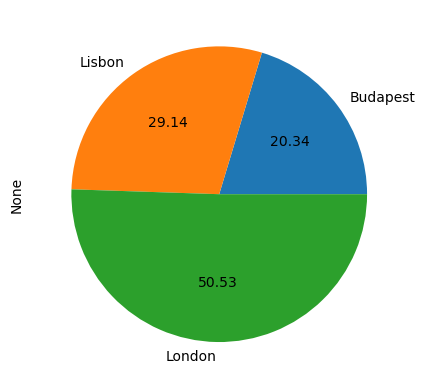

In [13]:
data.groupby('city').size().plot(kind='pie', autopct='%.2f')

- Data didominasi oleh kota London dan proporsi antara kota Lisbon dan Budapest hampir sama.

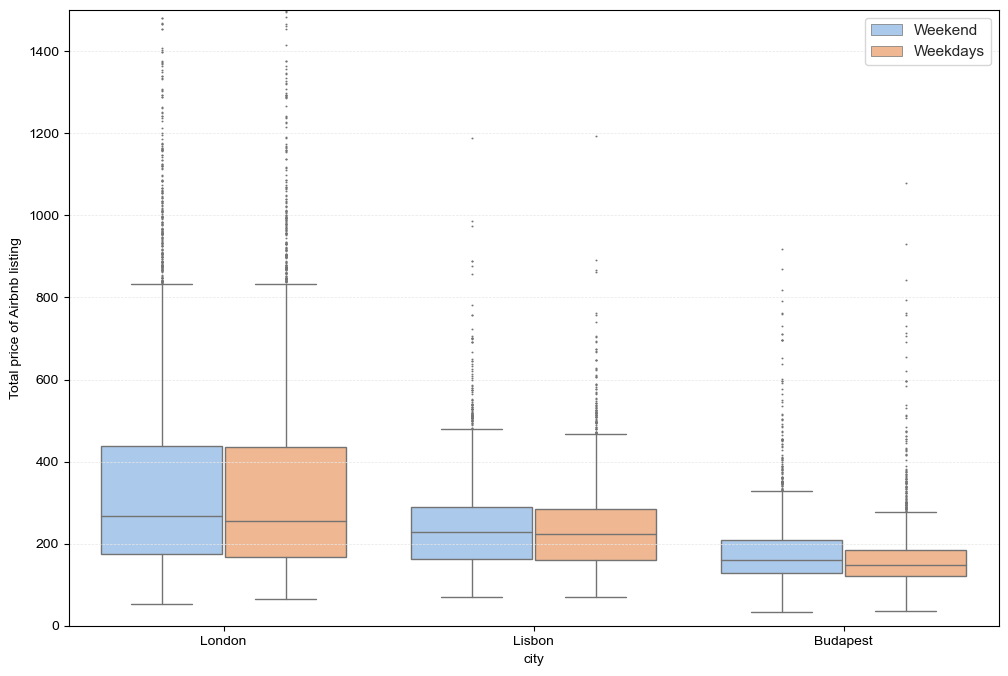

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.axis([0,8,0,1500])
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x="city", y="realSum", hue="status", 
            data=data, fliersize=0.5, linewidth=1)
plt.ylabel('Total price of Airbnb listing')
# ax.set_xticklabels(ranks)
plt.grid(axis='y', color='#E8E8E8', linestyle='--', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()

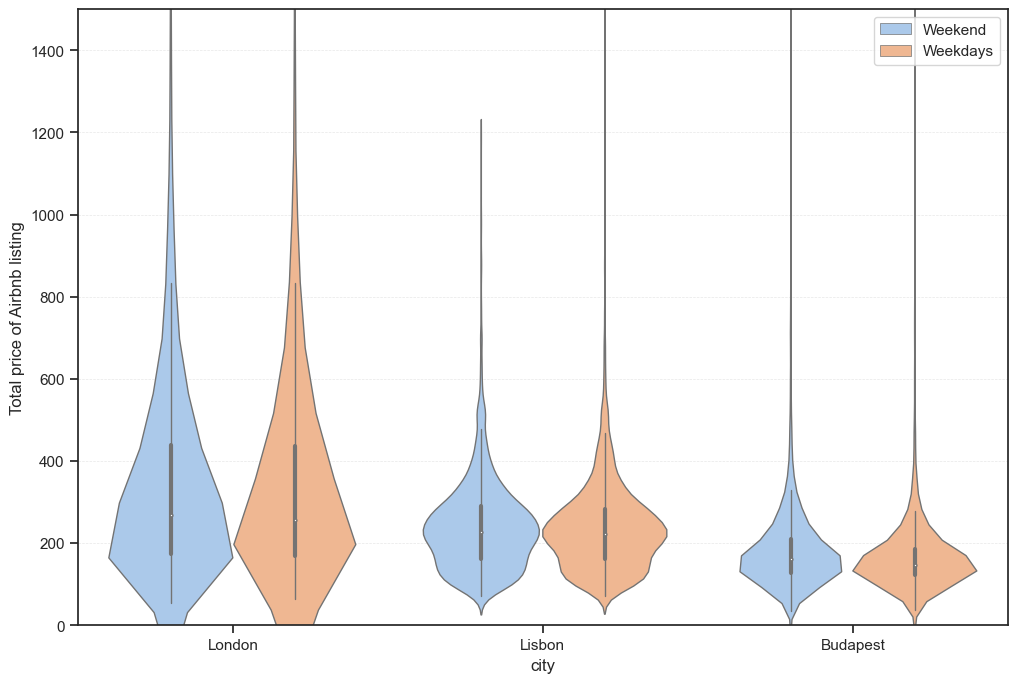

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.axis([0,8,0,1500])
sns.set_theme(style='ticks', palette='pastel')
sns.violinplot(x="city", y="realSum", hue="status", 
            data=data, fliersize=0.5, linewidth=1)
plt.ylabel('Total price of Airbnb listing')
# ax.set_xticklabels(ranks)
plt.grid(axis='y', color='#E8E8E8', linestyle='--', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()

- Harga dominan listing terbesar ada di kota London dikuti Lisbon dan Budapest
- Pada ketiga kota harga listing pada saat Weekend lebih tinggi.

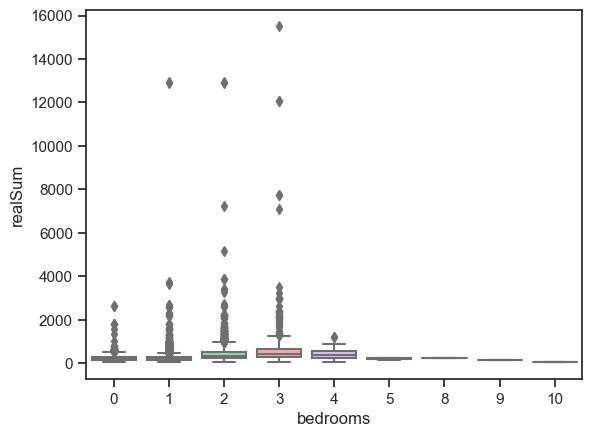

In [16]:
sns.boxplot(x = "bedrooms", y = "realSum", data = data)
plt.show()

- Jumlah bedrooms terbanyak ada di angka 3.

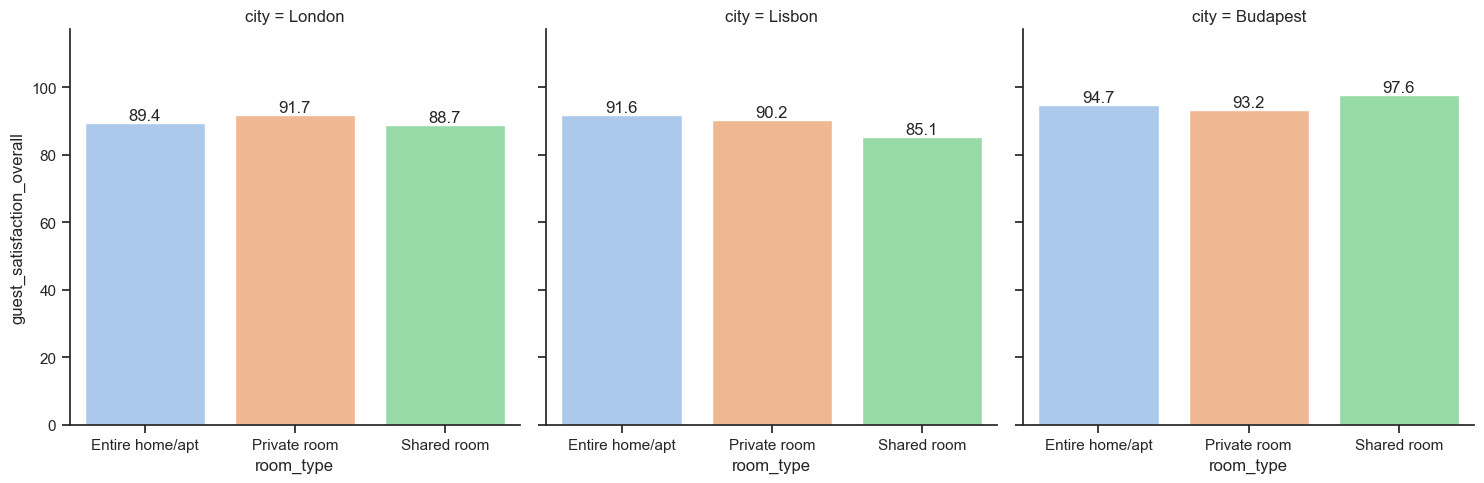

In [17]:
g= sns.catplot(x="room_type", y="guest_satisfaction_overall", 
            col="city",
            kind="bar", data=data, ci=None);

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

- Pada kota London proporsi `guest_satisfaction_overall` pada ketiga tipe ruangan tidak jauh berbeda dengan yang tertinggi adalah private room
- Pada kota Lisbon proporsi `guest_satisfaction_overall` pada ketiga tipe ruangan tidak jauh berbeda dengan yang tertinggi adalah entire home
- Pada kota Budapest proporsi `guest_satisfaction_overall` pada ketiga tipe ruangan tidak jauh berbeda dengan yang tertinggi adalah shared room

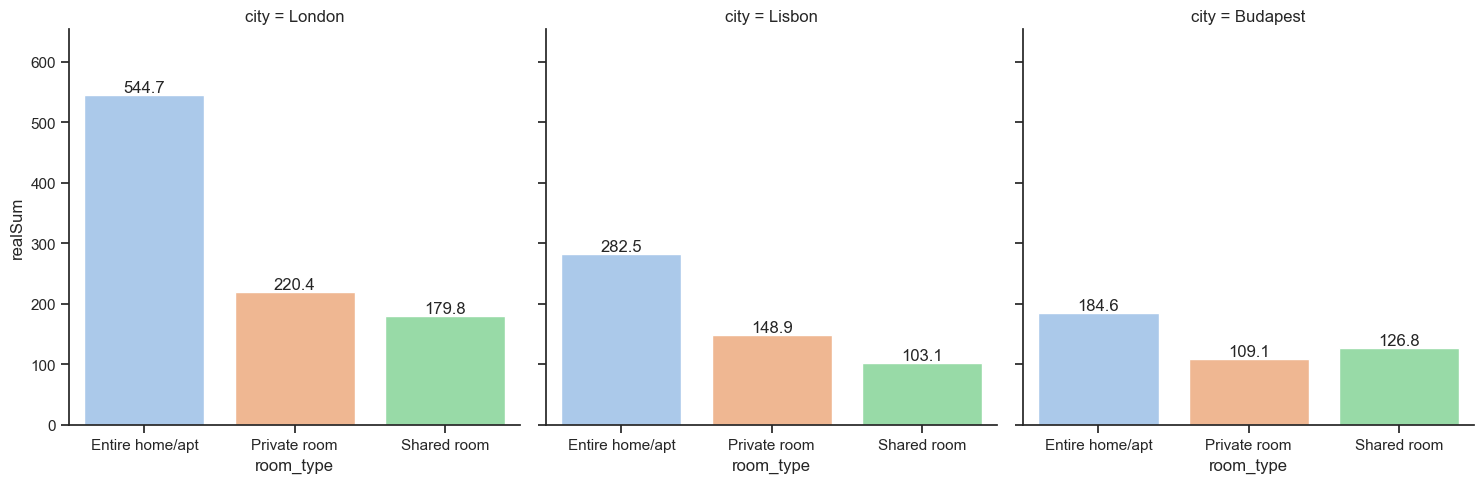

In [18]:
g= sns.catplot(x="room_type", y="realSum", 
            col="city",
            kind="bar", data=data, ci= None);

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
    
plt.show()

- Pada ketiga kota Entire home memiliki harga tertinggi.
- Pada kota London dan Lisbon memiliki urutan harga yang sama namun pada kota Budapest yang paling rendah harganya adalah tipe Private room. 

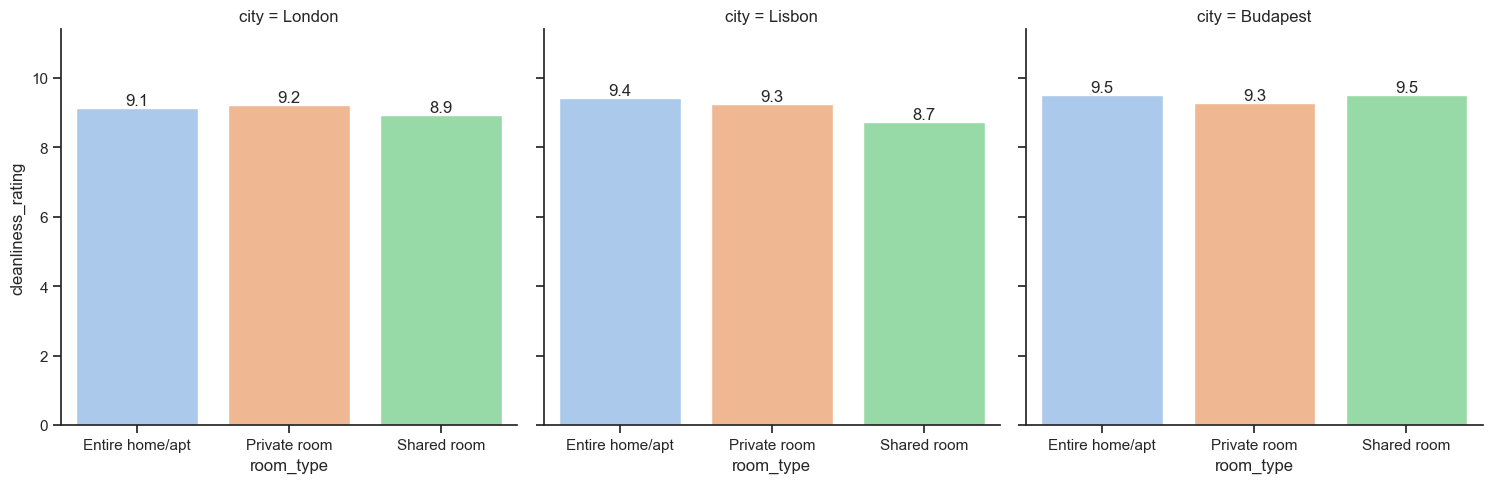

In [19]:
g= sns.catplot(x="room_type", y="cleanliness_rating", 
            col="city",
            kind="bar", data=data, ci = None);

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

- Pada kota London proporsi `cleanliness_rating` pada ketiga tipe ruangan tidak jauh berbeda dengan yang tertinggi adalah private room
- Pada kota Lisbon proporsi `cleanliness_rating` pada ketiga tipe ruangan tidak jauh berbeda dengan yang tertinggi adalah entire home
- Pada kota Budapest proporsi `cleanliness_rating` pada ketiga tipe ruangan tidak jauh berbeda dengan yang tertinggi adalah shared room

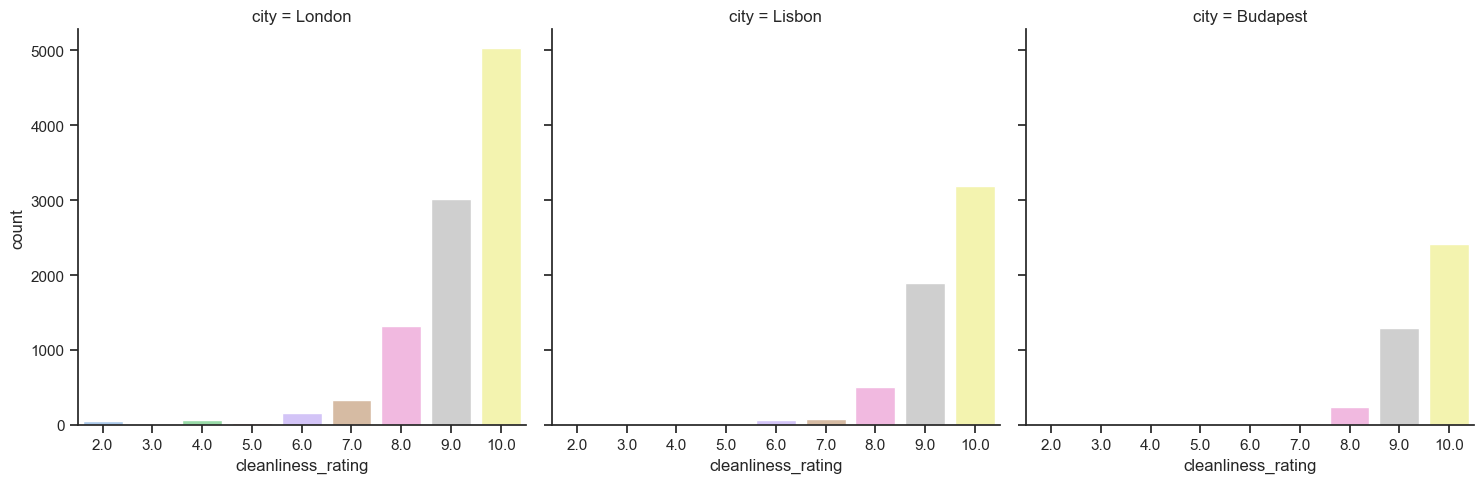

In [21]:
sns.catplot(x="cleanliness_rating", 
            col="city",
            kind="count", data=data);

plt.show()

- Pada kota London `cleanliness_rating` tersebar dari 2 - 10 dengan yang terbanyak 10.
- Pada kota Lisbon `cleanliness_rating` tersebar dari 6 - 10 dengan yang terbanyak 10.
- Pada kota Budapest `cleanliness_rating` tersebar dari 8 - 10 dengan yang terbanyak 10.

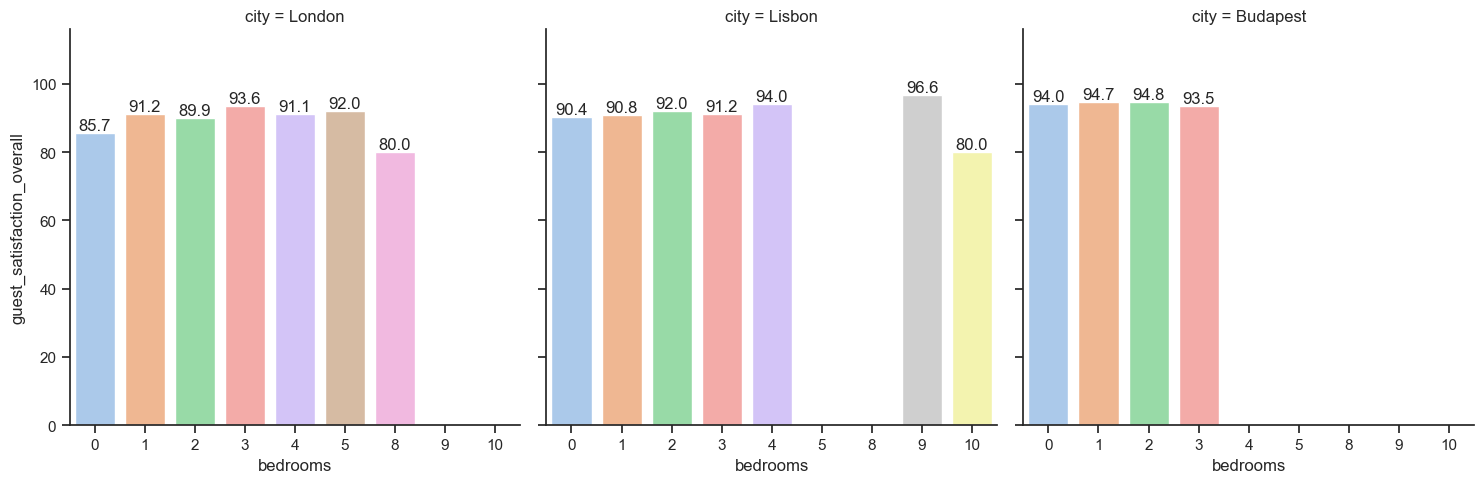

In [23]:
g= sns.catplot(x="bedrooms", y="guest_satisfaction_overall", 
            col="city",
            kind="bar", data=data, ci= None);

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

- Pada kota London jumlah bedroom dengan `guest_satisfaction_overall` tertinggi adalah 3 dan tidak memiliki bedroom dengan jumlah 9 atau 10.
- Pada kota Lisbon  jumlah bedroom dengan `guest_satisfaction_overall` tertinggi adalah 9 dan tidak memiliki bedroom dengan jumlah 5 atau 8.
- Pada kota Budapest  jumlah bedroom dengan `guest_satisfaction_overall` tertinggi adalah 3 dan tidak memiliki bedroom dengan jumlah 4 sampai 10.

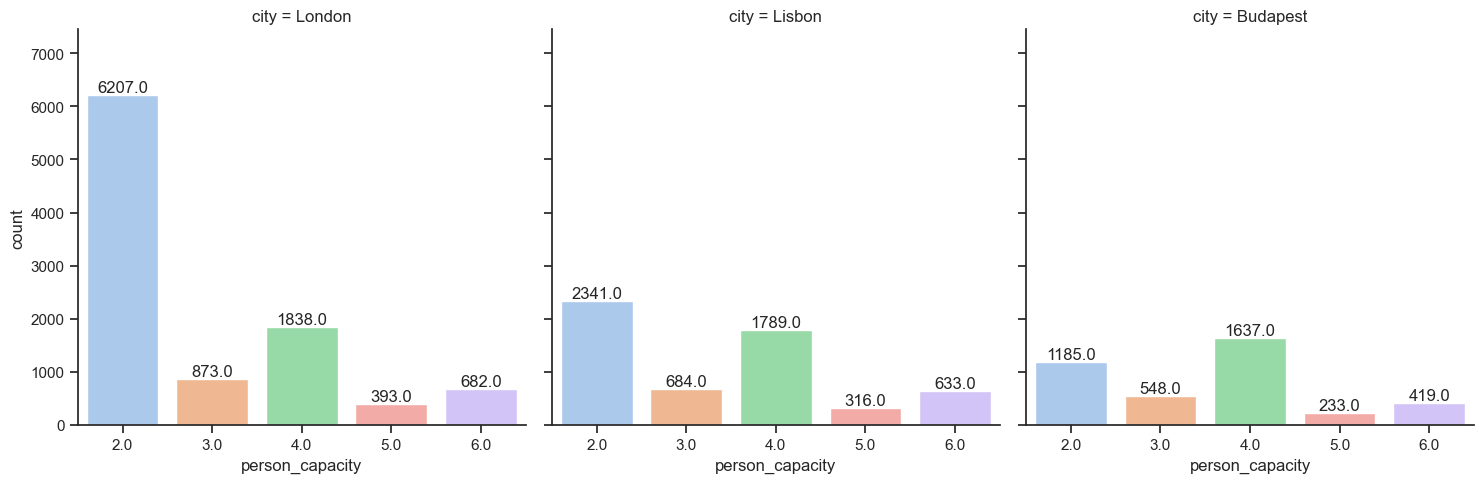

In [24]:
g = sns.catplot(x="person_capacity", 
            col="city",
            kind="count", data=data);

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

- Pada kota London dan Lisbon jumlah person_capacity terbanyak adalah 2.
- Pada kota Budapest jumlah person_capacity terbanyak adalah 4.

In [26]:
g= sns.catplot(x="person_capacity", y="realSum", 
            col="city",
            kind="bar", data=data, ci = None)

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

- Pada ketiga kota memilih pola yang sama dimana semakin besar kapasitas orang maka harga semakin tinggi.

In [27]:
g = sns.catplot(x="bedrooms", y="realSum", 
            col="city",
            kind="bar", data=data, ci = None);

for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

- Pada kota London jumlah bedroom tertinggi adalah 3 dan tidak memiliki bedroom dengan jumlah 9 atau 10.
- Pada kota Lisbon  jumlah bedroom  tertinggi adalah 4 dan tidak memiliki bedroom dengan jumlah 5 atau 8.
- Pada kota Budapest  jumlah bedroom  tertinggi adalah 3 dan tidak memiliki bedroom dengan jumlah 4 sampai 10.

In [13]:
import plotly.express as px
fig = px.scatter_mapbox(data, lat="lat", lon="lng", hover_name="city", 
                        hover_data=["room_type", "host_is_superhost"],
                        size='realSum',color='guest_satisfaction_overall',
                        color_discrete_sequence=['#5F8D4E','#E0FF4F','#F0544F'],zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### 3. Data Pre-Processing

In [87]:
data = data.sample(frac=1).reset_index(drop= True)
data

realSum        room_type  room_shared  room_private  \
0      219.901691  Entire home/apt        False         False   
1      159.005629     Private room        False          True   
2      720.619017  Entire home/apt        False         False   
3      206.731108  Entire home/apt        False         False   
4      180.241575  Entire home/apt        False         False   
...           ...              ...          ...           ...   
19773  528.611632  Entire home/apt        False         False   
19774  219.196124  Entire home/apt        False         False   
19775  502.598838  Entire home/apt        False         False   
19776   95.919325     Private room        False          True   
19777  409.832213  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      0    1                 9.0   
1                  2.0              False      0    1                10.0   
2                  2.0              False      0    1                10.0   
3                  4.0              False      0    0                 6.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
19773              6.0               True      0    1                10.0   
19774              2.0              False      1    0                 9.0   
19775              4.0              False      1    0                 2.0   
19776              2.0              False      0    1                 9.0   
19777              5.0               True      0    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            81.0  ...  6.726798    0.154935  190.246767   
1                            97.0  ...  2.876065    0.141877   97.257114   
2                           100.0  ...  3.570323    0.940438  304.346648   
3                            80.0  ...  7.313225    2.120164  151.274092   
4                            99.0  ...  1.114427    0.166240  193.817609   
...                           ...  ...       ...         ...         ...   
19773                        99.0  ...  0.147577    0.217844  512.303375   
19774                        91.0  ...  5.367970    0.464830  245.423815   
19775                        20.0  ...  4.950967    0.366078  266.110958   
19776                        85.0  ...  1.095857    0.083269  196.842890   
19777                        98.0  ...  0.384186    0.254171  269.866703   

       attr_index_norm   rest_index  rest_index_norm       lng       lat  \
0            13.224794   460.005304         8.233293  -0.22434  51.50638   
1             3.210874   255.175390        11.412396  -9.13414  38.73793   
2            21.156322   668.192224        11.959477  -0.12269  51.54027   
3            10.515652   321.710209         5.758052  -0.12110  51.44272   
4            11.567796   643.473832        56.251163  19.06900  47.49800   
...                ...          ...              ...       ...       ...   
19773        16.897439  1285.545824        72.251075  -9.13800  38.71200   
19774        17.060366   517.794837         9.267625  -0.05293  51.52105   
19775        18.497668   603.052218        10.798153  -0.19106  51.48816   
19776         6.492522   561.796318        31.574439  -9.13470  38.72146   
19777        16.106704   683.340079        59.736189  19.05692  47.49562   

         status      city  
0       Weekend    London  
1      Weekdays    Lisbon  
2       Weekend    London  
3       Weekend    London  
4       Weekend  Budapest  
...         ...       ...  
19773   Weekend    Lisbon  
19774   Weekend    London  
19775  Weekdays    London  
19776   Weekend    Lisbon  
19777   Weekend  Budapest  

[19778 rows x 21 columns]

In [88]:
data.replace({False: 0, True: 1},inplace=True)
data.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0  219.901691  Entire home/apt            0             0              2.0   
1  159.005629     Private room            0             1              2.0   
2  720.619017  Entire home/apt            0             0              2.0   
3  206.731108  Entire home/apt            0             0              4.0   
4  180.241575  Entire home/apt            0             0              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      0    1                 9.0   
1                  0      0    1                10.0   
2                  0      0    1                10.0   
3                  0      0    0                 6.0   
4                  1      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        81.0  ...  6.726798    0.154935  190.246767   
1                        97.0  ...  2.876065    0.141877   97.257114   
2                       100.0  ...  3.570323    0.940438  304.346648   
3                        80.0  ...  7.313225    2.120164  151.274092   
4                        99.0  ...  1.114427    0.166240  193.817609   

   attr_index_norm  rest_index  rest_index_norm       lng       lat    status  \
0        13.224794  460.005304         8.233293  -0.22434  51.50638   Weekend   
1         3.210874  255.175390        11.412396  -9.13414  38.73793  Weekdays   
2        21.156322  668.192224        11.959477  -0.12269  51.54027   Weekend   
3        10.515652  321.710209         5.758052  -0.12110  51.44272   Weekend   
4        11.567796  643.473832        56.251163  19.06900  47.49800   Weekend   

       city  
0    London  
1    Lisbon  
2    London  
3    London  
4  Budapest  

[5 rows x 21 columns]

In [89]:
data = pd.get_dummies(data, columns=['room_type'])
data.head()

realSum  room_shared  room_private  person_capacity  host_is_superhost  \
0  219.901691            0             0              2.0                  0   
1  159.005629            0             1              2.0                  0   
2  720.619017            0             0              2.0                  0   
3  206.731108            0             0              4.0                  0   
4  180.241575            0             0              2.0                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      0    1                 9.0                        81.0         0  ...   
1      0    1                10.0                        97.0         1  ...   
2      0    1                10.0                       100.0         1  ...   
3      0    0                 6.0                        80.0         2  ...   
4      0    0                10.0                        99.0         1  ...   

   attr_index_norm  rest_index  rest_index_norm       lng       lat    status  \
0        13.224794  460.005304         8.233293  -0.22434  51.50638   Weekend   
1         3.210874  255.175390        11.412396  -9.13414  38.73793  Weekdays   
2        21.156322  668.192224        11.959477  -0.12269  51.54027   Weekend   
3        10.515652  321.710209         5.758052  -0.12110  51.44272   Weekend   
4        11.567796  643.473832        56.251163  19.06900  47.49800   Weekend   

       city  room_type_Entire home/apt room_type_Private room  \
0    London                          1                      0   
1    Lisbon                          0                      1   
2    London                          1                      0   
3    London                          1                      0   
4  Budapest                          1                      0   

  room_type_Shared room  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 23 columns]

In [90]:
data= data.drop(['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','lng','lat'], axis= 1)
data

realSum  room_shared  room_private  person_capacity  \
0      219.901691            0             0              2.0   
1      159.005629            0             1              2.0   
2      720.619017            0             0              2.0   
3      206.731108            0             0              4.0   
4      180.241575            0             0              2.0   
...           ...          ...           ...              ...   
19773  528.611632            0             0              6.0   
19774  219.196124            0             0              2.0   
19775  502.598838            0             0              4.0   
19776   95.919325            0             1              2.0   
19777  409.832213            0             0              5.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
0                      0      0    1                 9.0   
1                      0      0    1                10.0   
2                      0      0    1                10.0   
3                      0      0    0                 6.0   
4                      1      0    0                10.0   
...                  ...    ...  ...                 ...   
19773                  1      0    1                10.0   
19774                  0      1    0                 9.0   
19775                  0      1    0                 2.0   
19776                  0      0    1                 9.0   
19777                  1      0    0                10.0   

       guest_satisfaction_overall  bedrooms      dist  metro_dist    status  \
0                            81.0         0  6.726798    0.154935   Weekend   
1                            97.0         1  2.876065    0.141877  Weekdays   
2                           100.0         1  3.570323    0.940438   Weekend   
3                            80.0         2  7.313225    2.120164   Weekend   
4                            99.0         1  1.114427    0.166240   Weekend   
...                           ...       ...       ...         ...       ...   
19773                        99.0         2  0.147577    0.217844   Weekend   
19774                        91.0         1  5.367970    0.464830   Weekend   
19775                        20.0         1  4.950967    0.366078  Weekdays   
19776                        85.0         1  1.095857    0.083269   Weekend   
19777                        98.0         2  0.384186    0.254171   Weekend   

           city  room_type_Entire home/apt  room_type_Private room  \
0        London                          1                       0   
1        Lisbon                          0                       1   
2        London                          1                       0   
3        London                          1                       0   
4      Budapest                          1                       0   
...         ...                        ...                     ...   
19773    Lisbon                          1                       0   
19774    London                          1                       0   
19775    London                          1                       0   
19776    Lisbon                          0                       1   
19777  Budapest                          1                       0   

       room_type_Shared room  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
19773                      0  
19774                      0  
19775                      0  
19776                      0  
19777                      0  

[19778 rows x 17 columns]

In [91]:
convert_dict = {'person_capacity': int
                }
df = df.astype(convert_dict)
df.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int32
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
status                         object
city                           object
dtype: object

In [92]:
data = pd.get_dummies(data, columns=['status'])
data.head()

realSum  room_shared  room_private  person_capacity  host_is_superhost  \
0  219.901691            0             0              2.0                  0   
1  159.005629            0             1              2.0                  0   
2  720.619017            0             0              2.0                  0   
3  206.731108            0             0              4.0                  0   
4  180.241575            0             0              2.0                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
0      0    1                 9.0                        81.0         0   
1      0    1                10.0                        97.0         1   
2      0    1                10.0                       100.0         1   
3      0    0                 6.0                        80.0         2   
4      0    0                10.0                        99.0         1   

       dist  metro_dist      city  room_type_Entire home/apt  \
0  6.726798    0.154935    London                          1   
1  2.876065    0.141877    Lisbon                          0   
2  3.570323    0.940438    London                          1   
3  7.313225    2.120164    London                          1   
4  1.114427    0.166240  Budapest                          1   

   room_type_Private room  room_type_Shared room  status_Weekdays  \
0                       0                      0                0   
1                       1                      0                1   
2                       0                      0                0   
3                       0                      0                0   
4                       0                      0                0   

   status_Weekend  
0               1  
1               0  
2               1  
3               1  
4               1

In [72]:
data['city'].value_counts()

London      9993
Lisbon      5763
Budapest    4022
Name: city, dtype: int64

### 4. Split Data

In [93]:
X = data.drop('city',axis=1)
y = data['city']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### 5. Modelling

In [95]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [96]:
clf.score(X_test, y_test), clf.score(X_train, y_train) 

(0.9110212335692619, 1.0)

In [97]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [98]:
abc.score(X_test, y_test), abc.score(X_train, y_train)

(0.8228850690933603, 0.8221612250794568)

In [99]:
estimator_range = np.arange(40, 50, 1)

In [100]:
models = []
scores = []

for n_estimators in estimator_range:

    abc = AdaBoostClassifier(n_estimators=n_estimators,
                         learning_rate=1)

    # Fit the model
    abc.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(abc)
    scores.append(accuracy_score(y_true = y_test, y_pred = abc.predict(X_test)))

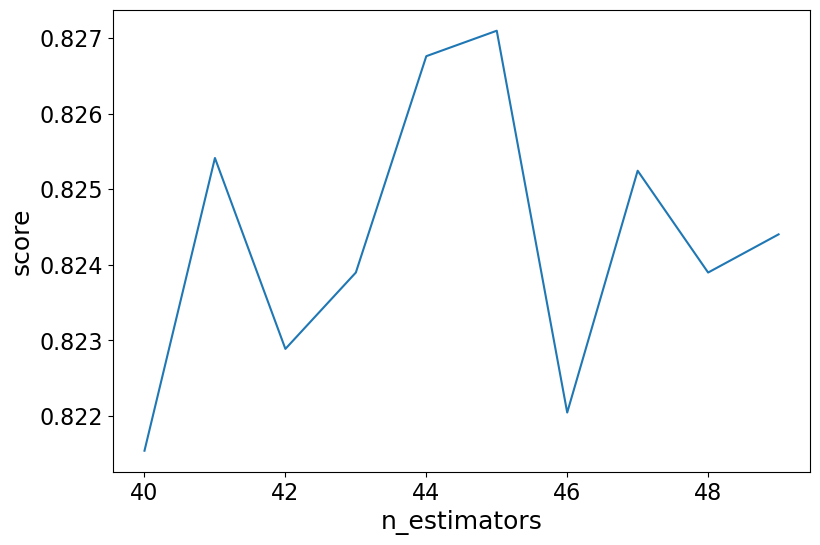

In [101]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [72]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators= 43,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [64]:
abc.score(X_test, y_test), abc.score(X_train, y_train)

(0.8153016514998315, 0.8181883848598671)

[0.32 0.   0.   0.06 0.   0.   0.02 0.06 0.02 0.06 0.3  0.06 0.1  0.
 0.   0.   0.  ]


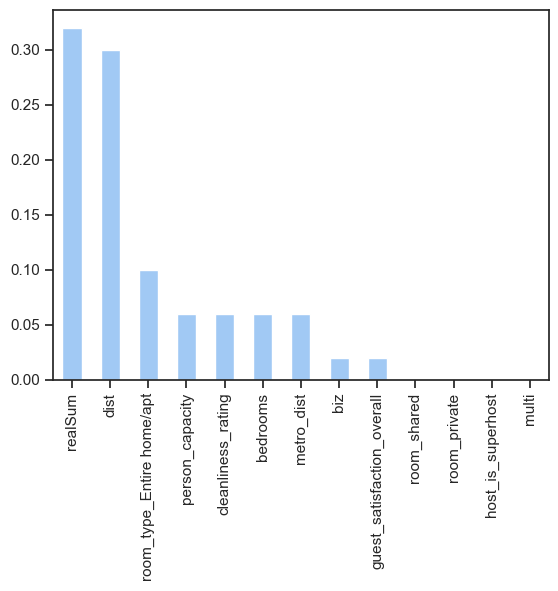

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
model = AdaBoostClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

 Variabel yang paling berpengaruh pada variabel dependen `City` menggunakan algoritma Adaboost berdasarkan grafik  adalah `realSum` dikuti oleh `dist` dimana nilai keduanya hampir sama dan jauh melampaui variabel lainnya. 

### 7. Kesimpulan

- `guest_satisfaction_overall` dan `cleanliness_rating` pada ketiga kota tidak jauh berbeda dikasaran 80% keatas.
- Pada ketiga kota jumlah kamar dan jumlah orang sangat berpengaruh dengan kenaikan harga.
- Metode Adaboost sangat direkomendasikan digunakan pada data jika ingin mencegah overfitting terjadi.
- Nilai n_estimators yang tepat berpengaruh terhadap kenaikan akurasi dan dapat mencegah overfitting.